# import ib

In [1]:
import pandas
import psycopg2
import configparser

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# connect to db

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
cur=conn.cursor()

# q1

In [4]:
df_student=pandas.read_sql_query('select * from gp28.student',conn)
df_student[:]

,s_email,s_name,major
0,conno3sm@dukes.jmu.edu,Sean Connolly,Intel Analysis
1,blackjt@dukes.jmu.edu,Jacob Black,Intel Analysis
2,s3@jmu.edu,s3,Intel Analysis
3,s4@jmu.edu,s4,Intel Analysis
4,s6@jmu.edu,s5,ia


# q2

In [19]:
sql_q2 = """select gp28.professor.p_name, gp28.course.c_name 
from gp28.professor 
inner join gp28.course 
on gp28.professor.p_email = gp28.course.p_email

"""

In [20]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Xuebin Wei,data mining
1,Stphen Marrin,issues in IA
2,Noel Hendrickson,reasoning
3,Zhuojun Duan,intro to java
4,Joe Thomas,geology
5,Mary Williams,countries
6,peter krien,IA study
7,peter krien,advanced java


# q3

In [21]:
sql_q3 = """ select c_number, count(c_number) as enrolled
from gp28.enroll_list group by c_number order by enrolled desc
"""

<AxesSubplot:xlabel='c_number'>

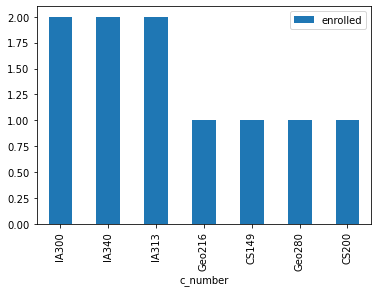

In [23]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled', x='c_number')

# q4

In [24]:
sql_q4 = """ select gp28.professor.p_name, count(gp28.course.c_name) as teaching_number
from gp28.professor inner join gp28.course
on gp28.professor.p_email = gp28.course.p_email
group by professor.p_name order by teaching_number desc
"""

<AxesSubplot:xlabel='p_name'>

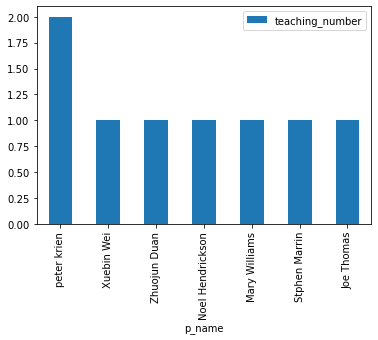

In [26]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number', x='p_name')

# q5

In [49]:
sql_q5_professor = """ insert into gp28.professor(p_email,p_name,p_office)
values('{}','{}','{}')
""".format('new_p@jmu.edu','new_p','new_office')

In [50]:
cur.execute(sql_q5_professor)

In [51]:
conn.commit()

In [52]:
df=pandas.read_sql_query('select * from gp28.professor',conn)
df[:]

,p_email,p_name,p_office
0,duanzx@jmu.edu,Zhuojun Duan,ISAT 246B\n
1,marrinsp@jmu.edu,Stphen Marrin,EnGeo 2104
2,weixx@jmu.edu,Xuebin Wei,ISAT 112
3,hendrinx@jmu.edu,Noel Hendrickson,ISAT 317\n
4,thomasj@jmu.edu,Joe Thomas,ISAT 211
5,williamsm@jmu.edu,Mary Williams,EnGeo 342\n
6,t8@jmu.edu,peter krien,ISAT 191
7,new_p@jmu.edu,new_p,new_office


In [53]:
sql_q5_course = """ insert into gp28.course(c_number,c_name,c_room,p_email)
values('{}','{}','{}','{}')
""".format('ia_new','new_c_name','online','new_p@jmu.edu') 

In [54]:
cur.execute(sql_q5_course)

In [55]:
conn.commit()

In [56]:
df=pandas.read_sql_query('select * from gp28.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,IA340,data mining,EnGeo 2010,weixx@jmu.edu
1,IA300,issues in IA,ISAT 0150,marrinsp@jmu.edu
2,IA313,reasoning,EnGeo 1204,hendrinx@jmu.edu
3,CS149,intro to java,ISAT 0248,duanzx@jmu.edu
4,Geo216,geology,EnGeo 116,thomasj@jmu.edu
5,Geo280,countries,EnGeo 207,williamsm@jmu.edu
6,IA 320,IA study,ISAT 300,t8@jmu.edu
7,CS200,advanced java,ISAT 0248,t8@jmu.edu
8,ia_new,new_c_name,online,new_p@jmu.edu


# q6

In [34]:
sql_q6_course = """ update gp28.course set p_email = '{}' where p_email = '{}'
""".format('new_p@jmu.edu','weixx@jmu.edu') 

In [35]:
cur.execute(sql_q6_course)

In [36]:
#cur.execute('ROLLBACK')

In [37]:
conn.commit()

In [38]:
df=pandas.read_sql_query('select * from gp28.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,IA300,issues in IA,ISAT 0150,marrinsp@jmu.edu
1,IA313,reasoning,EnGeo 1204,hendrinx@jmu.edu
2,CS149,intro to java,ISAT 0248,duanzx@jmu.edu
3,Geo216,geology,EnGeo 116,thomasj@jmu.edu
4,Geo280,countries,EnGeo 207,williamsm@jmu.edu
5,IA 320,IA study,ISAT 300,t8@jmu.edu
6,CS200,advanced java,ISAT 0248,t8@jmu.edu
7,ia_new,new_c_name,online,new_p@jmu.edu
8,IA340,data mining,EnGeo 2010,new_p@jmu.edu


In [39]:
sql_q6_professor = """delete from gp28.professor where p_email = '{}' 
""".format('weixx@jmu.edu.edu') 

In [40]:
conn.commit()

In [41]:
df=pandas.read_sql_query('select * from gp28.professor', conn)
df[:]

,p_email,p_name,p_office
0,duanzx@jmu.edu,Zhuojun Duan,ISAT 246B\n
1,marrinsp@jmu.edu,Stphen Marrin,EnGeo 2104
2,weixx@jmu.edu,Xuebin Wei,ISAT 112
3,hendrinx@jmu.edu,Noel Hendrickson,ISAT 317\n
4,thomasj@jmu.edu,Joe Thomas,ISAT 211
5,williamsm@jmu.edu,Mary Williams,EnGeo 342\n
6,t8@jmu.edu,peter krien,ISAT 191
7,new_p@jmu.edu,new_p,new_office


In [42]:
cur.close()

In [43]:
conn.close()